In [8]:
# !pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## loading the data

In [13]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [15]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [16]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [17]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [18]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


## cleaning the data

In [19]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [21]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [23]:
gold_data.drop('Date',axis=1,inplace=True)

In [25]:
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

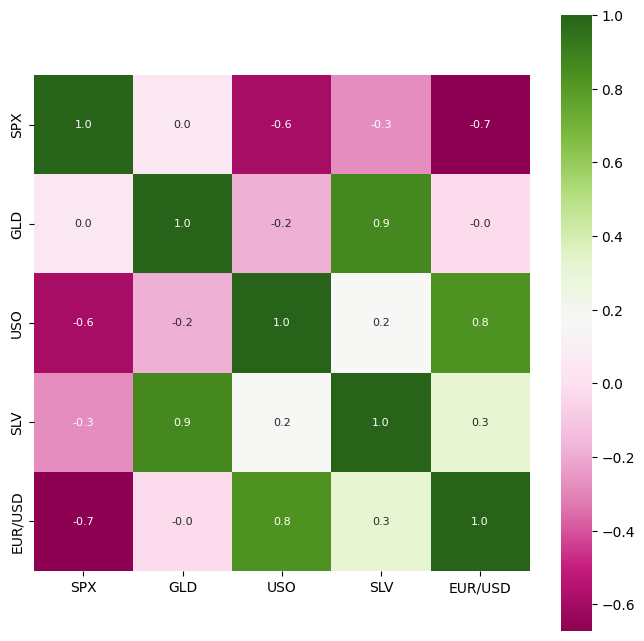

In [31]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='PiYG')

In [32]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\senth\AppData\Local\Temp\ipykernel_1376\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

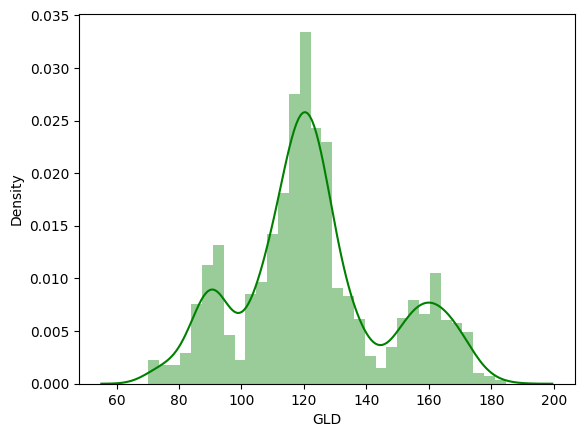

In [36]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

# splitting the features and target

In [38]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=2)

In [43]:
X_train

,SPX,USO,SLV,EUR/USD
66,1360.550049,88.180000,17.812000,1.582203
2007,2297.419922,11.540000,16.570000,1.076171
934,1416.510010,40.770000,31.940001,1.336005
155,1003.349976,67.779999,10.590000,1.361804
1677,2086.050049,14.440000,14.820000,1.116096
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [44]:
X_test

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
1048,1454.920044,34.130001,31.930000,1.310788
2143,2496.840088,10.490000,15.910000,1.178606
1583,2101.040039,18.709999,15.530000,1.108205
141,1156.390015,77.500000,11.900000,1.430492


In [48]:
Y_train.shape

(1603,)

In [46]:
Y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
1048    169.419998
2143    123.139999
1583    115.000000
141      85.459999
1719    110.750000
Name: GLD, Length: 687, dtype: float64

# training the model

In [50]:
#  Model Training: Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)
regressor

RandomForestRegressor()

In [51]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [53]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
test_data_prediction

array([168.66419986,  81.81600011, 116.12070005, 127.28990116,
       120.63710197, 154.72549826, 150.84199985, 126.1762004 ,
       117.95539894, 125.95600077, 116.28230104, 172.48830109,
       141.61739888, 168.04409852, 115.38370015, 117.81000035,
       138.67260239, 170.45480066, 160.36360324, 161.10530021,
       154.88429985, 125.49249975, 174.86630064, 157.11660324,
       125.07620077,  94.01169905,  76.53700024, 120.33270011,
       119.27640035, 167.38760078,  88.33329859, 125.45010156,
        91.06080079, 117.71599958, 121.10599923, 136.53940206,
       115.2439008 , 116.48740074, 148.24549985, 107.30900109,
       103.5236017 ,  87.14539757, 126.6323004 , 117.59989959,
       153.22689895, 119.69360023, 108.27360107, 108.0769979 ,
        93.19779984, 127.06119767,  74.63240037, 113.75639957,
       121.07689991, 111.06629866, 118.78159871, 120.08220014,
       159.13449975, 165.72330186, 146.7744969 ,  86.28779957,
        94.21159967,  86.69499851,  90.48410016, 118.81

In [54]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894023216363883


In [59]:
#  Model Training: Linear Regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf

LinearRegression()

In [60]:
# training the model
clf.fit(X_train,Y_train)

LinearRegression()

In [65]:
# prediction on Test Data
test_prediction = clf.predict(X_test)
test_prediction

array([159.45418744,  81.36647706, 113.47341507, 128.50060572,
       126.12745577, 141.32029457, 165.50879755, 124.36182725,
       113.87938196, 122.91558062, 113.87904354, 174.95424223,
       132.64686836, 159.25357979, 118.81884711, 122.06472047,
       150.38166241, 161.26591291, 152.27223146, 162.21731306,
       145.86304934, 118.03209693, 180.27571608, 178.15530371,
       123.39918646,  98.86992773,  76.54513324, 119.33651653,
       113.79540713, 159.26674329,  93.82933672, 119.95753559,
        88.42239002, 114.26627059, 112.80395948, 144.20720365,
       118.71880679, 115.83286615, 144.07082067, 113.76079787,
       100.52711017,  89.2564381 , 120.26625212, 110.50178206,
       146.49200536, 119.25602002, 110.97351498, 111.30022589,
        96.34626168, 123.32770175,  79.54257322, 115.29285939,
       121.73976159, 114.50634739, 120.82677882, 117.07140437,
       152.30066376, 182.80740675, 196.74240277,  90.92250411,
       101.8092917 ,  87.30570094,  94.40999581, 119.06

In [66]:
# R squared error
error_score = metrics.r2_score(Y_test,test_prediction)
print("R squared error : ", error_score)

R squared error :  0.8742729610724103


## Conclusion: by comparing all 2 models, RF is giving good accuracy, so i prefer RF.

In [55]:
# Compare the Actual Values and Predicted Values in a Plot
Y_test = list(Y_test)

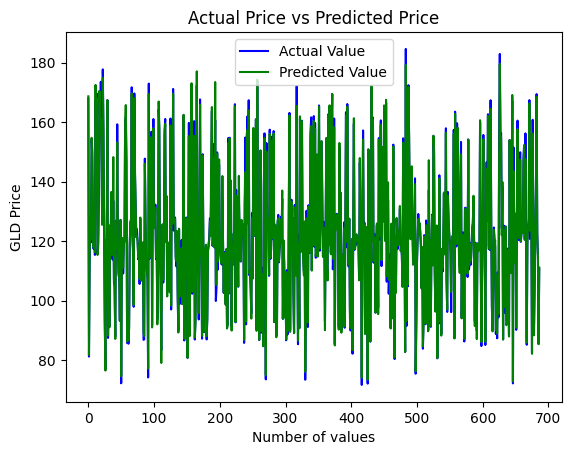

In [56]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()